In [1]:
from src import *
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [3]:
datasets = ['Abortion', 'Brexit', 'Election', 'Gun', 'Partisanship', 'Referendum_']

## EC \& ECC


In [2]:
# ec_ecc('figs/ec_ecc_dif', (100, 5, 620, 280))

## Joint Distribution

In [ ]:
for d in datasets:
    joint_distribution(nx.read_gml(f'Output/{d}/graph.gml'), save_path=f'figs/joint_distribution/{d}.pdf')

## Border

===Abortion===
===Brexit===
===Election===
===Gun===
===Partisanship===
===Referendum_===


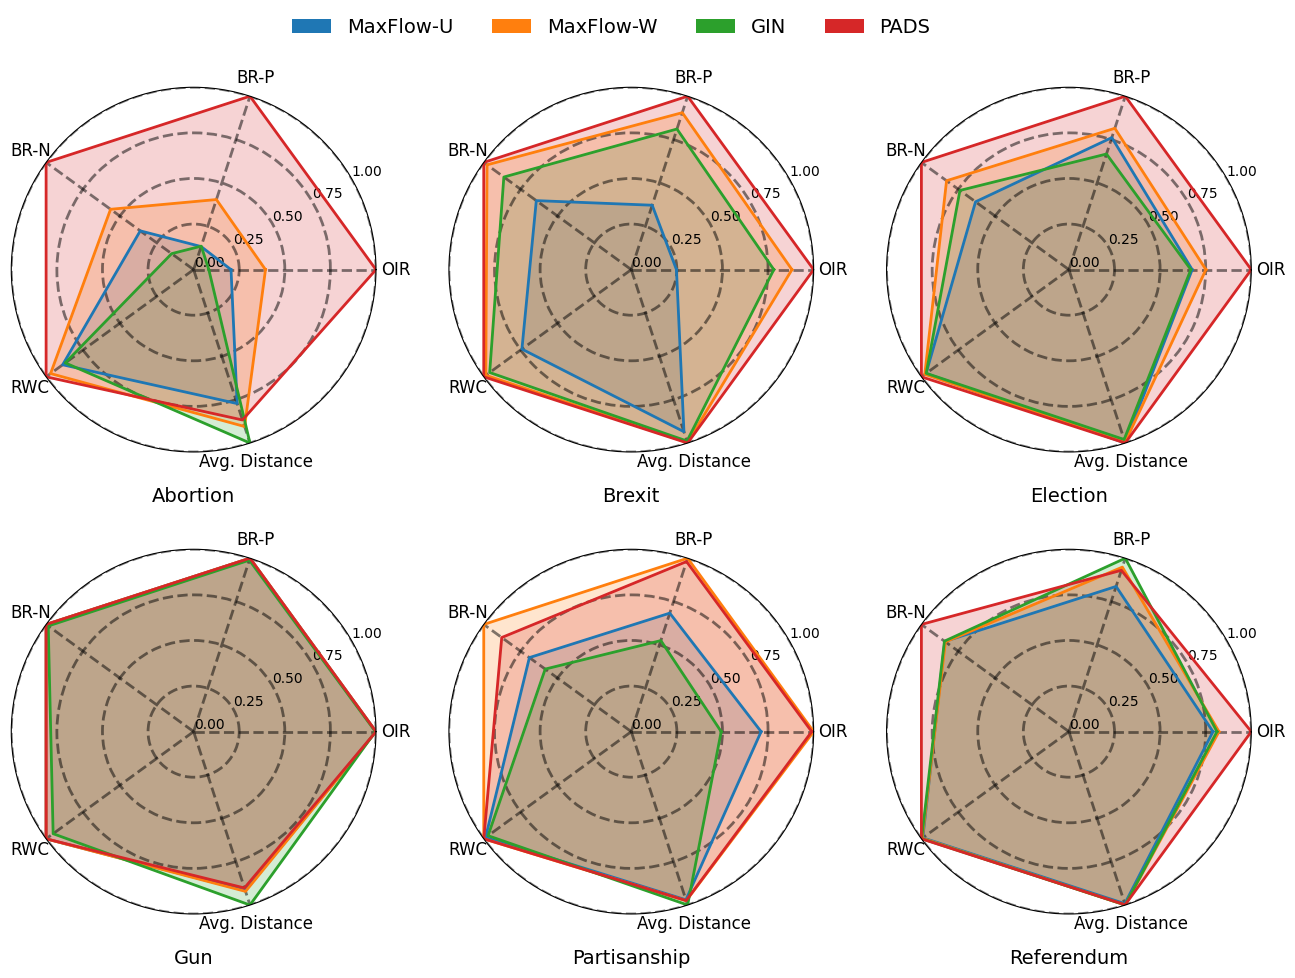

In [3]:
# for d in datasets:
#     print(f'==={d}===')
#     border_stat(f'Output/{d}/graph.gml', save_path=f'Output/{d}/border_stat.csv')
# radar_chart('Output', 'figs/border_statistics')

## Diffusion

In [4]:
# for d in datasets:
#     my_diffusion(f'Output/{d}/graph.gml', f'Output/{d}/diffusion.json')

Processing negative nodes: 100%|██████████| 406/406 [00:00<00:00, 979.30it/s]


In [5]:
# for d in datasets:
#     print(f'==={d}===')
#     for m in ['maxflow_cpp_udsp', 'maxflow_cpp_wdsp', 'node2vec_gin', 'pads_cpp']:
#         mean_diffusion(f'Output/{d}/graph.gml', f'Output/{d}/diffusion.json', m, filter=False)

===Abortion===
For maxflow_cpp_udsp: pos_on_neg(0.0031306222291578143, neg_on_pos(0.001049491246843379)
For maxflow_cpp_wdsp: pos_on_neg(0.0007355344291415214, neg_on_pos(0.0001331744661177722)
For node2vec_gin: pos_on_neg(0.0003624710794420677, neg_on_pos(9.638148930425771e-05)
For pads_cpp: pos_on_neg(0.000874275868323747, neg_on_pos(0.00021987424845446965)
===Brexit===
For maxflow_cpp_udsp: pos_on_neg(0.21568415777632874, neg_on_pos(0.007542675096955539)
For maxflow_cpp_wdsp: pos_on_neg(0.10608044567334755, neg_on_pos(0.005587796056558485)
For node2vec_gin: pos_on_neg(0.12113250465769433, neg_on_pos(0.005620048350417401)
For pads_cpp: pos_on_neg(0.10253144226904157, neg_on_pos(0.004415618375203032)
===Election===
For maxflow_cpp_udsp: pos_on_neg(0.03188574696527112, neg_on_pos(0.02243162710595891)
For maxflow_cpp_wdsp: pos_on_neg(0.02508003951784663, neg_on_pos(0.02205936357020653)
For node2vec_gin: pos_on_neg(0.038735355070037863, neg_on_pos(0.023706808226208066)
For pads_cpp: pos_

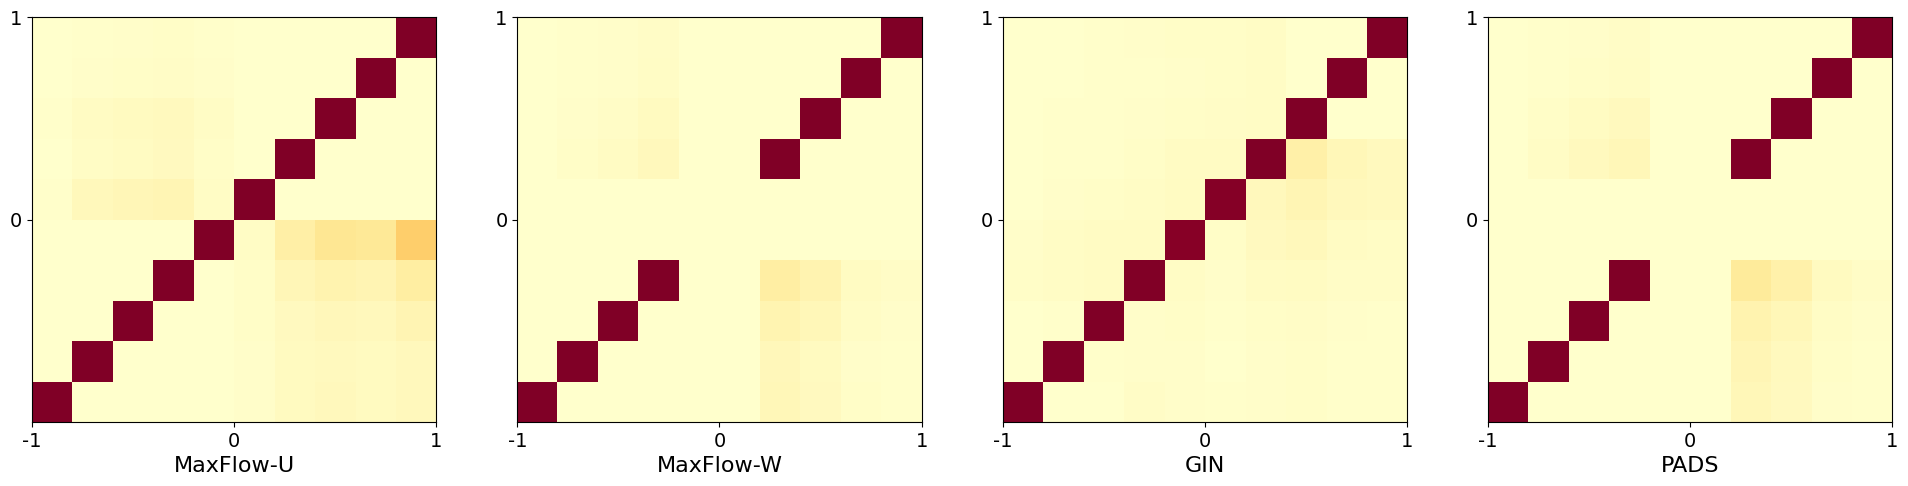

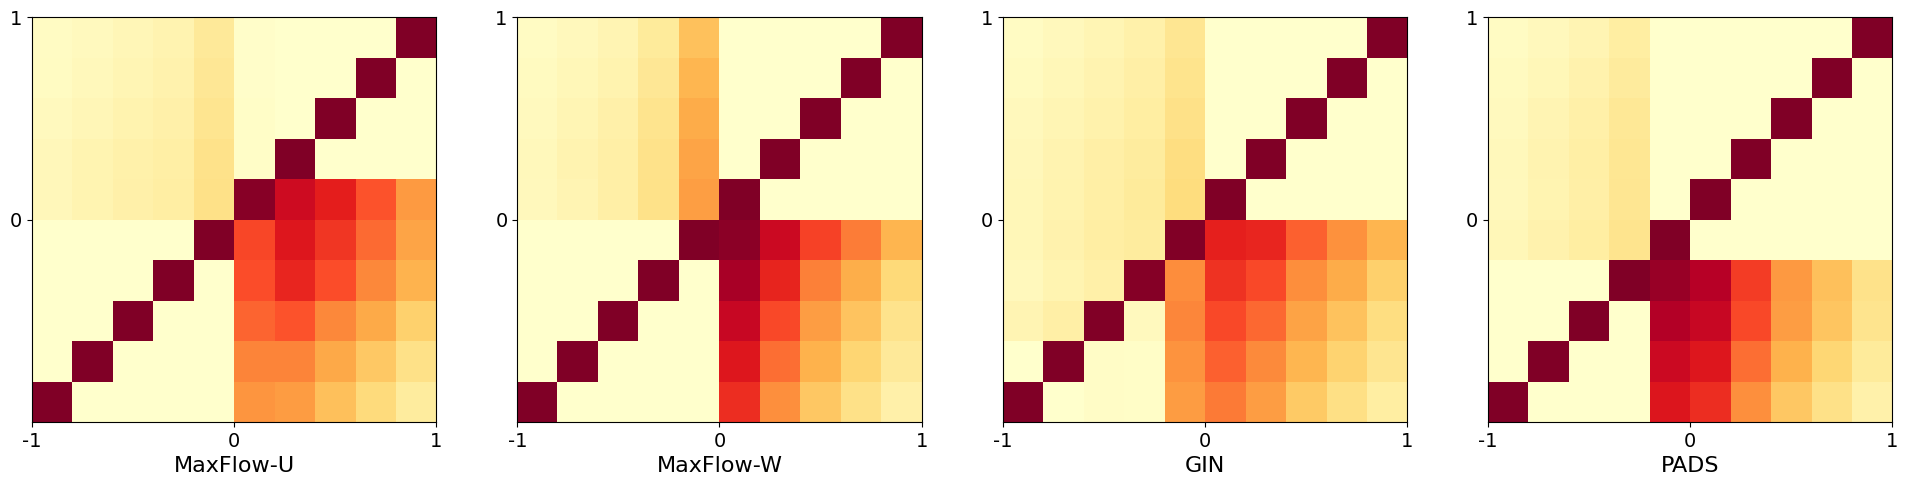

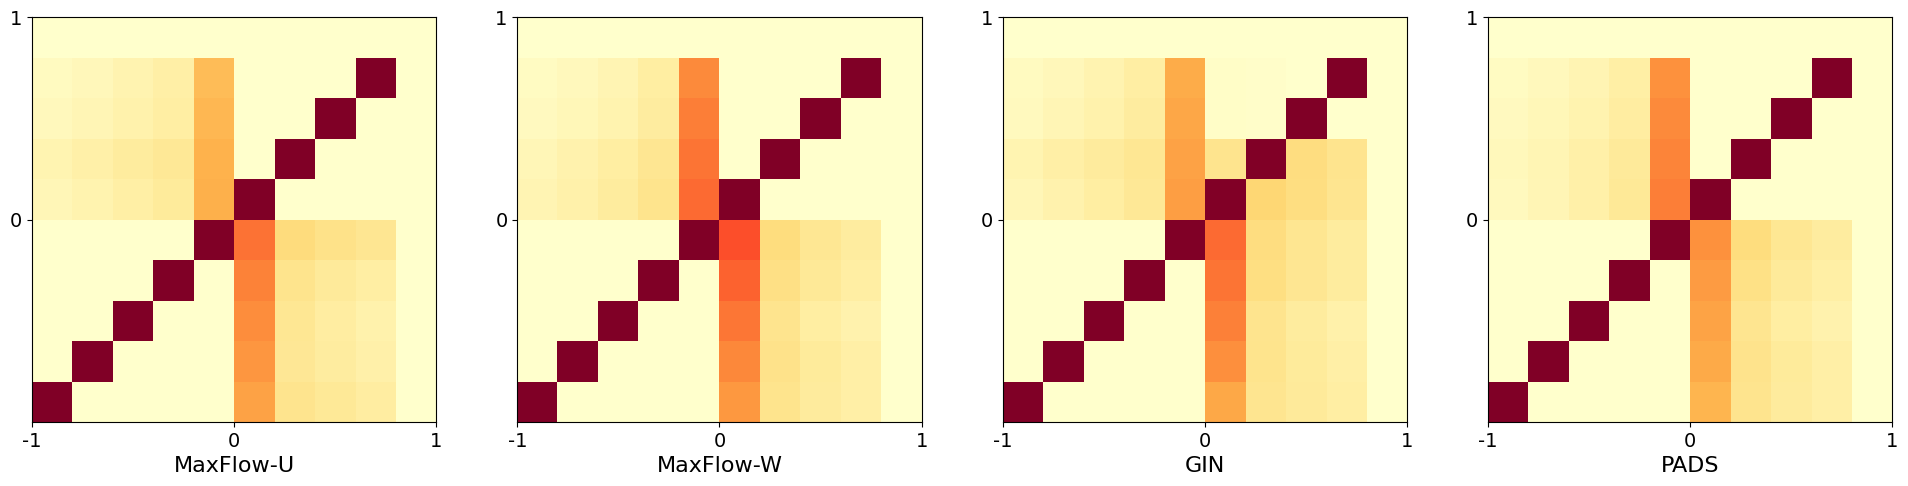

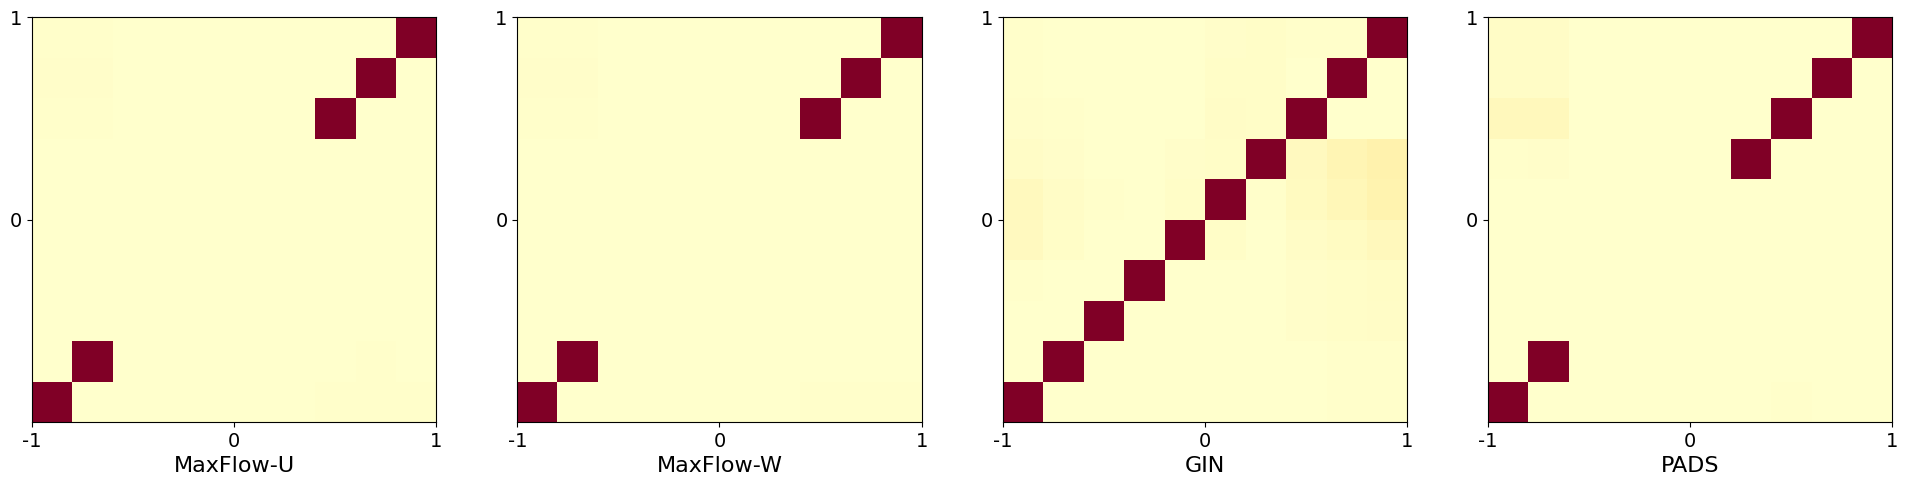

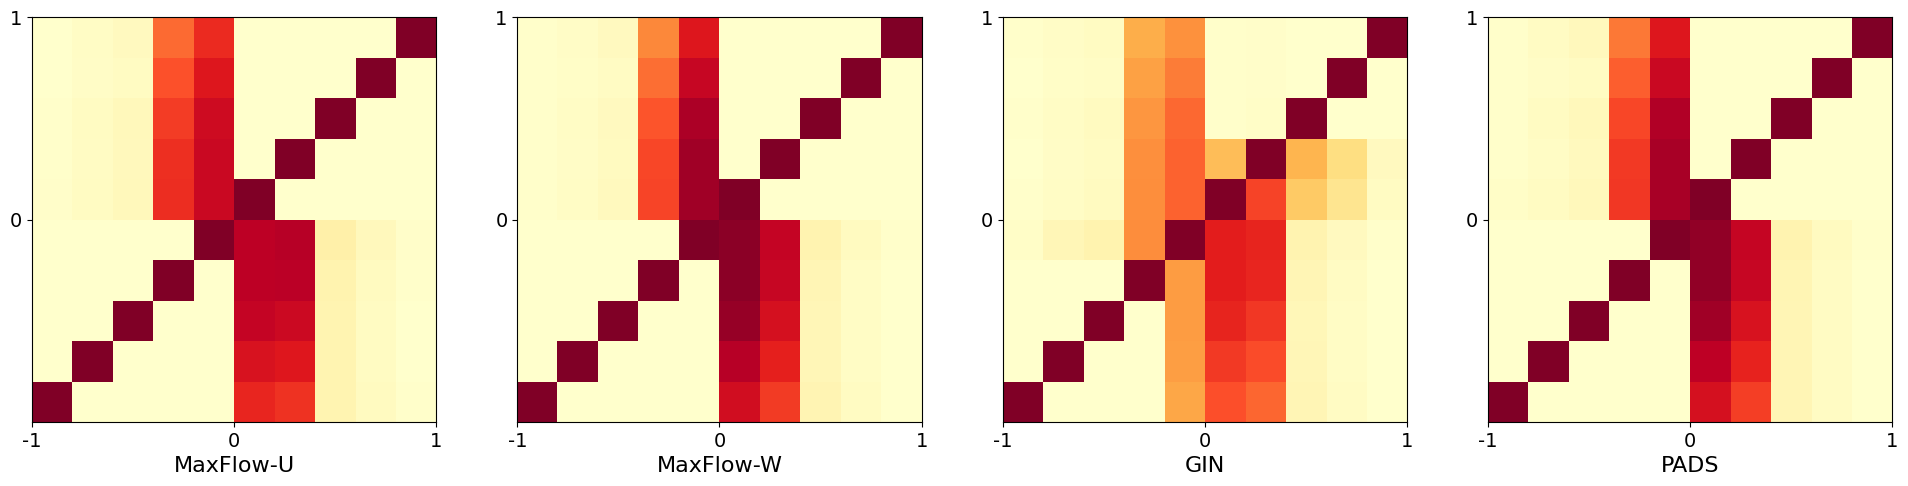

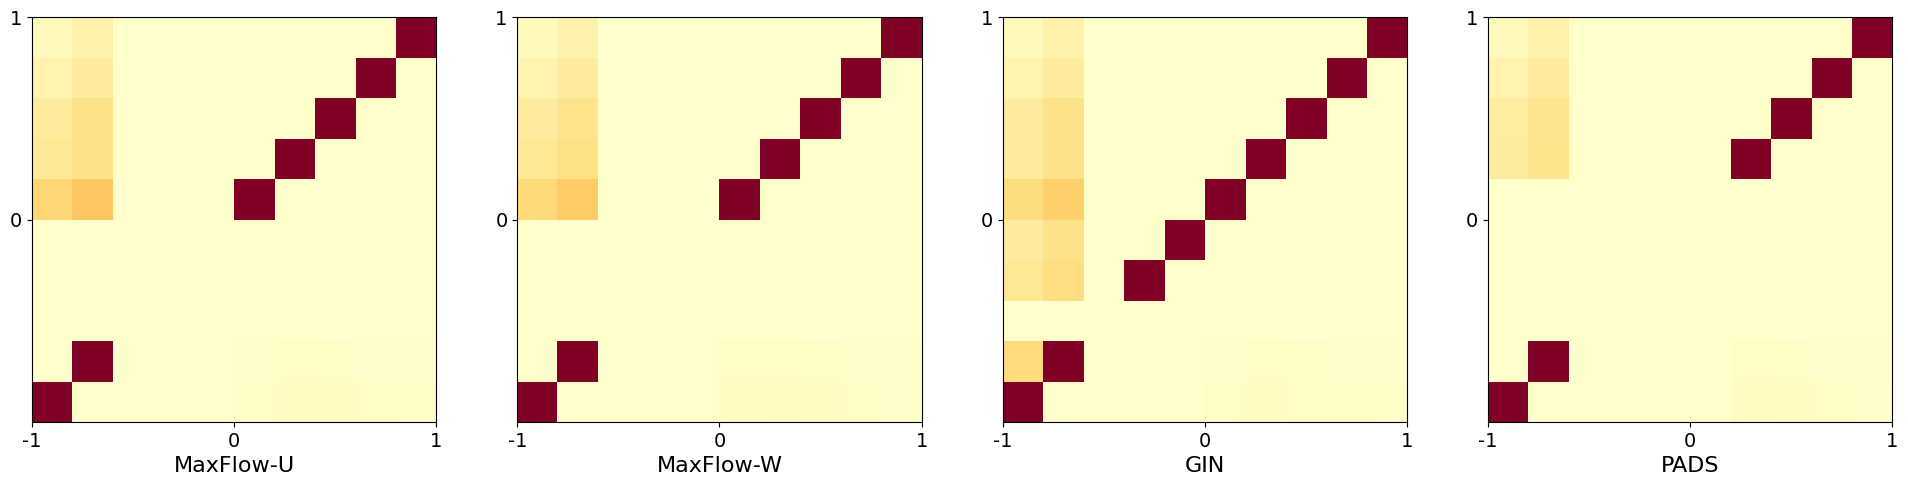

In [3]:
for d in datasets:
    create_heatmap(f'Output/{d}/graph.gml', f'Output/{d}/diffusion.json', save_path=f'figs/heatmap/{d}.pdf')

## F curve

In [ ]:
# fs_curve('figs/fs_curve/fs.pdf')

## Theta Influence

In [ ]:
for d in datasets[1:2]:
    theta_influence(d, f'figs/theta_influence/{d}.pdf')

## Opinions Dynamics

===Dataset Abortion===
===Dataset Brexit===
===Dataset Election===
===Dataset Gun===
===Dataset Partisanship===
===Dataset Referendum_===


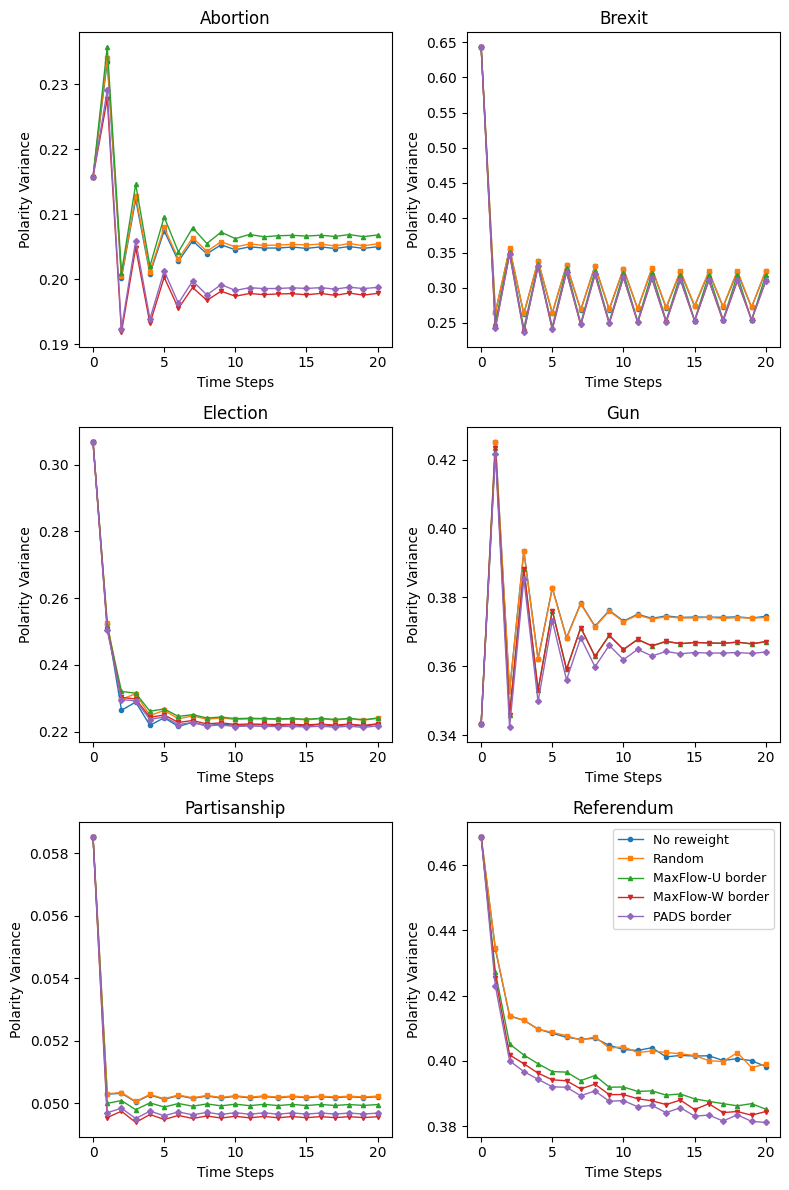

In [4]:
plot_opinion_dynamics(save_path='figs/opinion_dynamics/fj.pdf')

## Diameter \& Polarity

In [ ]:
plot_polarity_distance(datasets)